<a href="https://colab.research.google.com/github/DatumLearning/Mediapipe-playlist/blob/main/5_selfie_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mediapipe -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 18.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.4 which is incompatible.


In [ ]:
!wget -O portrait_model.tflite -q https://storage.googleapis.com/mediapipe-models/image_segmenter/selfie_segmenter/float16/latest/selfie_segmenter.tflite

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

import numpy as np
import mediapipe as mp

from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [ ]:
base_options = python.BaseOptions(model_asset_path='portrait_model.tflite')
options = vision.ImageSegmenterOptions(base_options=base_options,
                                       output_category_mask=True)

In [ ]:
image_file = "/content/portrait.jpg"

In [ ]:
with vision.ImageSegmenter.create_from_options(options) as segmenter:
  image = mp.Image.create_from_file(image_file)
  segmentation_result = segmenter.segment(image)

/usr/local/lib/python3.10/dist-packages/mediapipe/tasks/python/vision/image_segmenter.py:158: UserWarning: MessageFactory class is deprecated. Please use GetMessageClass() instead of MessageFactory.GetPrototype. MessageFactory class will be removed after 2024.
  graph_config = self._runner.get_graph_config()


In [ ]:
dir(segmentation_result)

['__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'category_mask',
 'confidence_masks']

In [ ]:
dir(segmentation_result.category_mask)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'channels',
 'create_from_file',
 'height',
 'image_format',
 'is_aligned',
 'is_contiguous',
 'is_empty',
 'numpy_view',
 'step',
 'uses_gpu',
 'width']

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
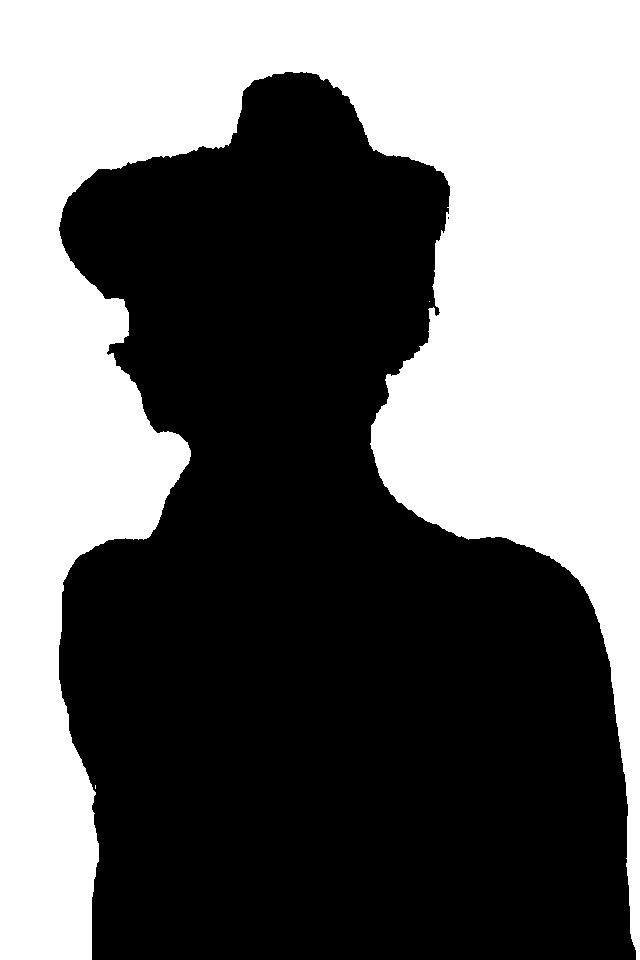

In [ ]:
segmentation_result.category_mask.numpy_view()

In [ ]:
segmentation_result.category_mask.numpy_view().sum()

68671245

In [ ]:
np.unique(segmentation_result.category_mask.numpy_view())

array([  0, 255], dtype=uint8)

In [ ]:
mask = segmentation_result.category_mask.numpy_view()

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ...,   0, 255, 255],
       [255, 255, 255, ...,   0, 255, 255],
       [255, 255, 255, ...,   0, 255, 255]], dtype=uint8)
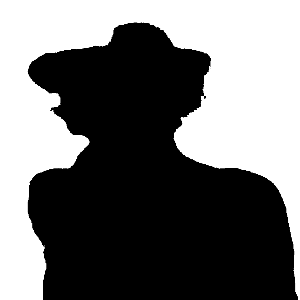

In [ ]:
cv2.resize(mask , (300 , 300))

In [ ]:
invert_mask = cv2.bitwise_not(mask)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ..., 255,   0,   0]], dtype=uint8)
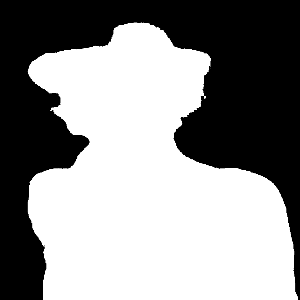

In [ ]:
cv2.resize(invert_mask , (300 , 300))

In [ ]:
def display(mask):

  img = cv2.imread(image_file)
  result = cv2.bitwise_and(img,img, mask= mask)

  masked_img = cv2.resize(result , (300 , 300))

  img = cv2.resize(img , (300 , 300))
  concatenated_image = np.concatenate((masked_img , img), axis=1)

  cv2_imshow(concatenated_image)

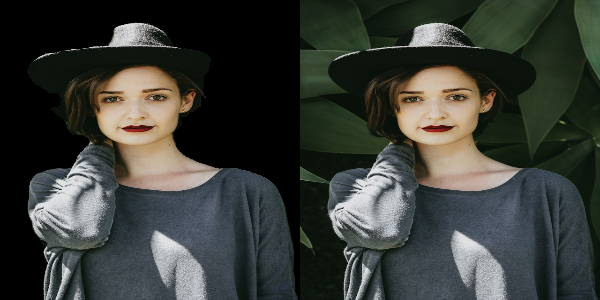

In [ ]:
display(invert_mask)

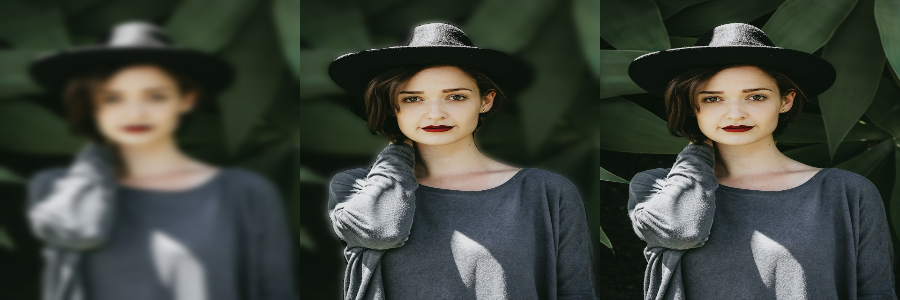

In [ ]:
img = cv2.imread("/content/portrait.jpg")
blurred_image = cv2.GaussianBlur(img , (55 , 55) , 0)
fin = np.where(np.dstack([invert_mask]*3) == 255 , img , blurred_image)
blurred_image = cv2.resize(blurred_image , (300 , 300))
fin = cv2.resize(fin , (300 , 300))
img = cv2.resize(img , (300 , 300))
concatenated_image = np.concatenate((blurred_image, fin , img), axis=1)
cv2_imshow(concatenated_image)